In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sn
import optuna
import os

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import preprocessing

from sklearn.model_selection import cross_validate
from sklearn.metrics import matthews_corrcoef, make_scorer
from sklearn.model_selection import KFold, cross_val_score


In [3]:
features_df_path = os.path.join(os.getcwd(),'build_models_features\Features_data_df.csv')
data_df = pd.read_csv(features_df_path)


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14400 entries, 0 to 14399
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Mean                         14400 non-null  float64
 1   Variance                     14400 non-null  float64
 2   Mode                         14400 non-null  float64
 3   Median                       14400 non-null  float64
 4   Skewness                     14400 non-null  float64
 5   Kurtosis                     14400 non-null  float64
 6   RMS                          14400 non-null  float64
 7   Line_Length                  14400 non-null  float64
 8   Entropy_MVN                  14400 non-null  float64
 9   Approximate_Entropy          14400 non-null  float64
 10  Sample_Entropy               158 non-null    float64
 11  Permutation entropy          14400 non-null  float64
 12  SVD_Entropy                  14400 non-null  float64
 13  LZ_Complexity   

In [4]:
data_df.drop('Sample_Entropy',axis=1,inplace=True)

In [5]:
data_df.isna().sum()

Mean                           0
Variance                       0
Mode                           0
Median                         0
Skewness                       0
Kurtosis                       0
RMS                            0
Line_Length                    0
Entropy_MVN                    0
Approximate_Entropy            0
Permutation entropy            0
SVD_Entropy                    0
LZ_Complexity                  0
Hjorth_Mobility                0
Hjorth_Complexity              0
DF_CPM                         0
DP                             0
P_PSD_G_DP                     0
Spectral_Entropy               0
BandPower_3-7                  0
BandPower_7-11                 0
BandPower_11-15                0
Crest_Factor_PSD               0
Median_Frequency               0
MPF                            0
Petrosian_Fractal_Dimension    0
Katz_Fractal_Dimension         0
MFCC1                          0
MFCC2                          0
MFCC3                          0
MFCC4     

In [6]:
data_df.dropna(axis=0,inplace=True)

In [7]:
data_df.isna().sum()

Mean                           0
Variance                       0
Mode                           0
Median                         0
Skewness                       0
Kurtosis                       0
RMS                            0
Line_Length                    0
Entropy_MVN                    0
Approximate_Entropy            0
Permutation entropy            0
SVD_Entropy                    0
LZ_Complexity                  0
Hjorth_Mobility                0
Hjorth_Complexity              0
DF_CPM                         0
DP                             0
P_PSD_G_DP                     0
Spectral_Entropy               0
BandPower_3-7                  0
BandPower_7-11                 0
BandPower_11-15                0
Crest_Factor_PSD               0
Median_Frequency               0
MPF                            0
Petrosian_Fractal_Dimension    0
Katz_Fractal_Dimension         0
MFCC1                          0
MFCC2                          0
MFCC3                          0
MFCC4     

In [8]:
data_df.shape

(14400, 35)

In [9]:
data_df.sample()

,Mean,Variance,Mode,Median,Skewness,Kurtosis,RMS,Line_Length,Entropy_MVN,Approximate_Entropy,...,Petrosian_Fractal_Dimension,Katz_Fractal_Dimension,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,state,channel,ID
3273,0.000648,0.002692,-0.11794,-0.004715,0.348866,-0.128645,0.051891,2.522378,-1.527,-0.033902,...,1.071496,6.119315,197.182159,-19.356144,21.646023,-7.604982,5.905236,postprandial,1.0,10.0


In [10]:
data_df.describe()

,Mean,Variance,Mode,Median,Skewness,Kurtosis,RMS,Line_Length,Entropy_MVN,Approximate_Entropy,...,MPF,Petrosian_Fractal_Dimension,Katz_Fractal_Dimension,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,channel,ID
count,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,...,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000
mean,-0.000035,0.091301,-0.376885,-0.000651,0.035510,2.150904,0.136518,5.194055,-1.045909,-0.032560,...,0.130689,1.068095,3.657960,252.650315,-0.713809,6.031400,2.612308,-0.714670,2.000000,20.500000
std,0.042212,0.522566,0.903567,0.019033,1.177904,4.662032,0.272857,9.249998,0.753991,0.007583,...,0.022811,0.008158,1.809802,75.098503,17.156360,13.207051,13.003777,12.654033,0.816525,11.543797
min,-0.475989,0.000383,-10.565470,-0.119632,-5.649380,-1.403664,0.019706,0.775557,-2.502000,-0.033902,...,0.055830,1.030056,1.240510,104.782906,-61.571312,-43.830551,-60.334450,-57.242733,1.000000,1.000000
25%,-0.008872,0.002524,-0.276144,-0.009707,-0.390950,-0.232170,0.050675,2.165606,-1.559000,-0.033902,...,0.115359,1.062442,2.621977,202.150467,-11.279201,-2.751169,-5.589005,-8.979659,1.000000,10.750000
50%,-0.000279,0.005707,-0.173361,-0.001060,0.016357,0.459040,0.077046,3.194689,-1.151000,-0.033902,...,0.129686,1.068975,3.287476,241.576172,-0.168334,5.710078,2.778280,-0.371246,2.000000,20.500000
75%,0.007768,0.014895,-0.110769,0.007782,0.440687,2.191844,0.123493,5.311827,-0.671750,-0.033902,...,0.145792,1.074009,4.217878,285.204918,10.841413,14.651643,11.142618,7.505551,3.000000,30.250000
max,0.543792,7.600026,-0.029374,0.208934,5.673135,31.504799,2.757167,95.831627,2.446000,0.157196,...,0.221616,1.093825,66.233772,592.348755,74.235588,54.961029,50.679832,57.825027,3.000000,40.000000


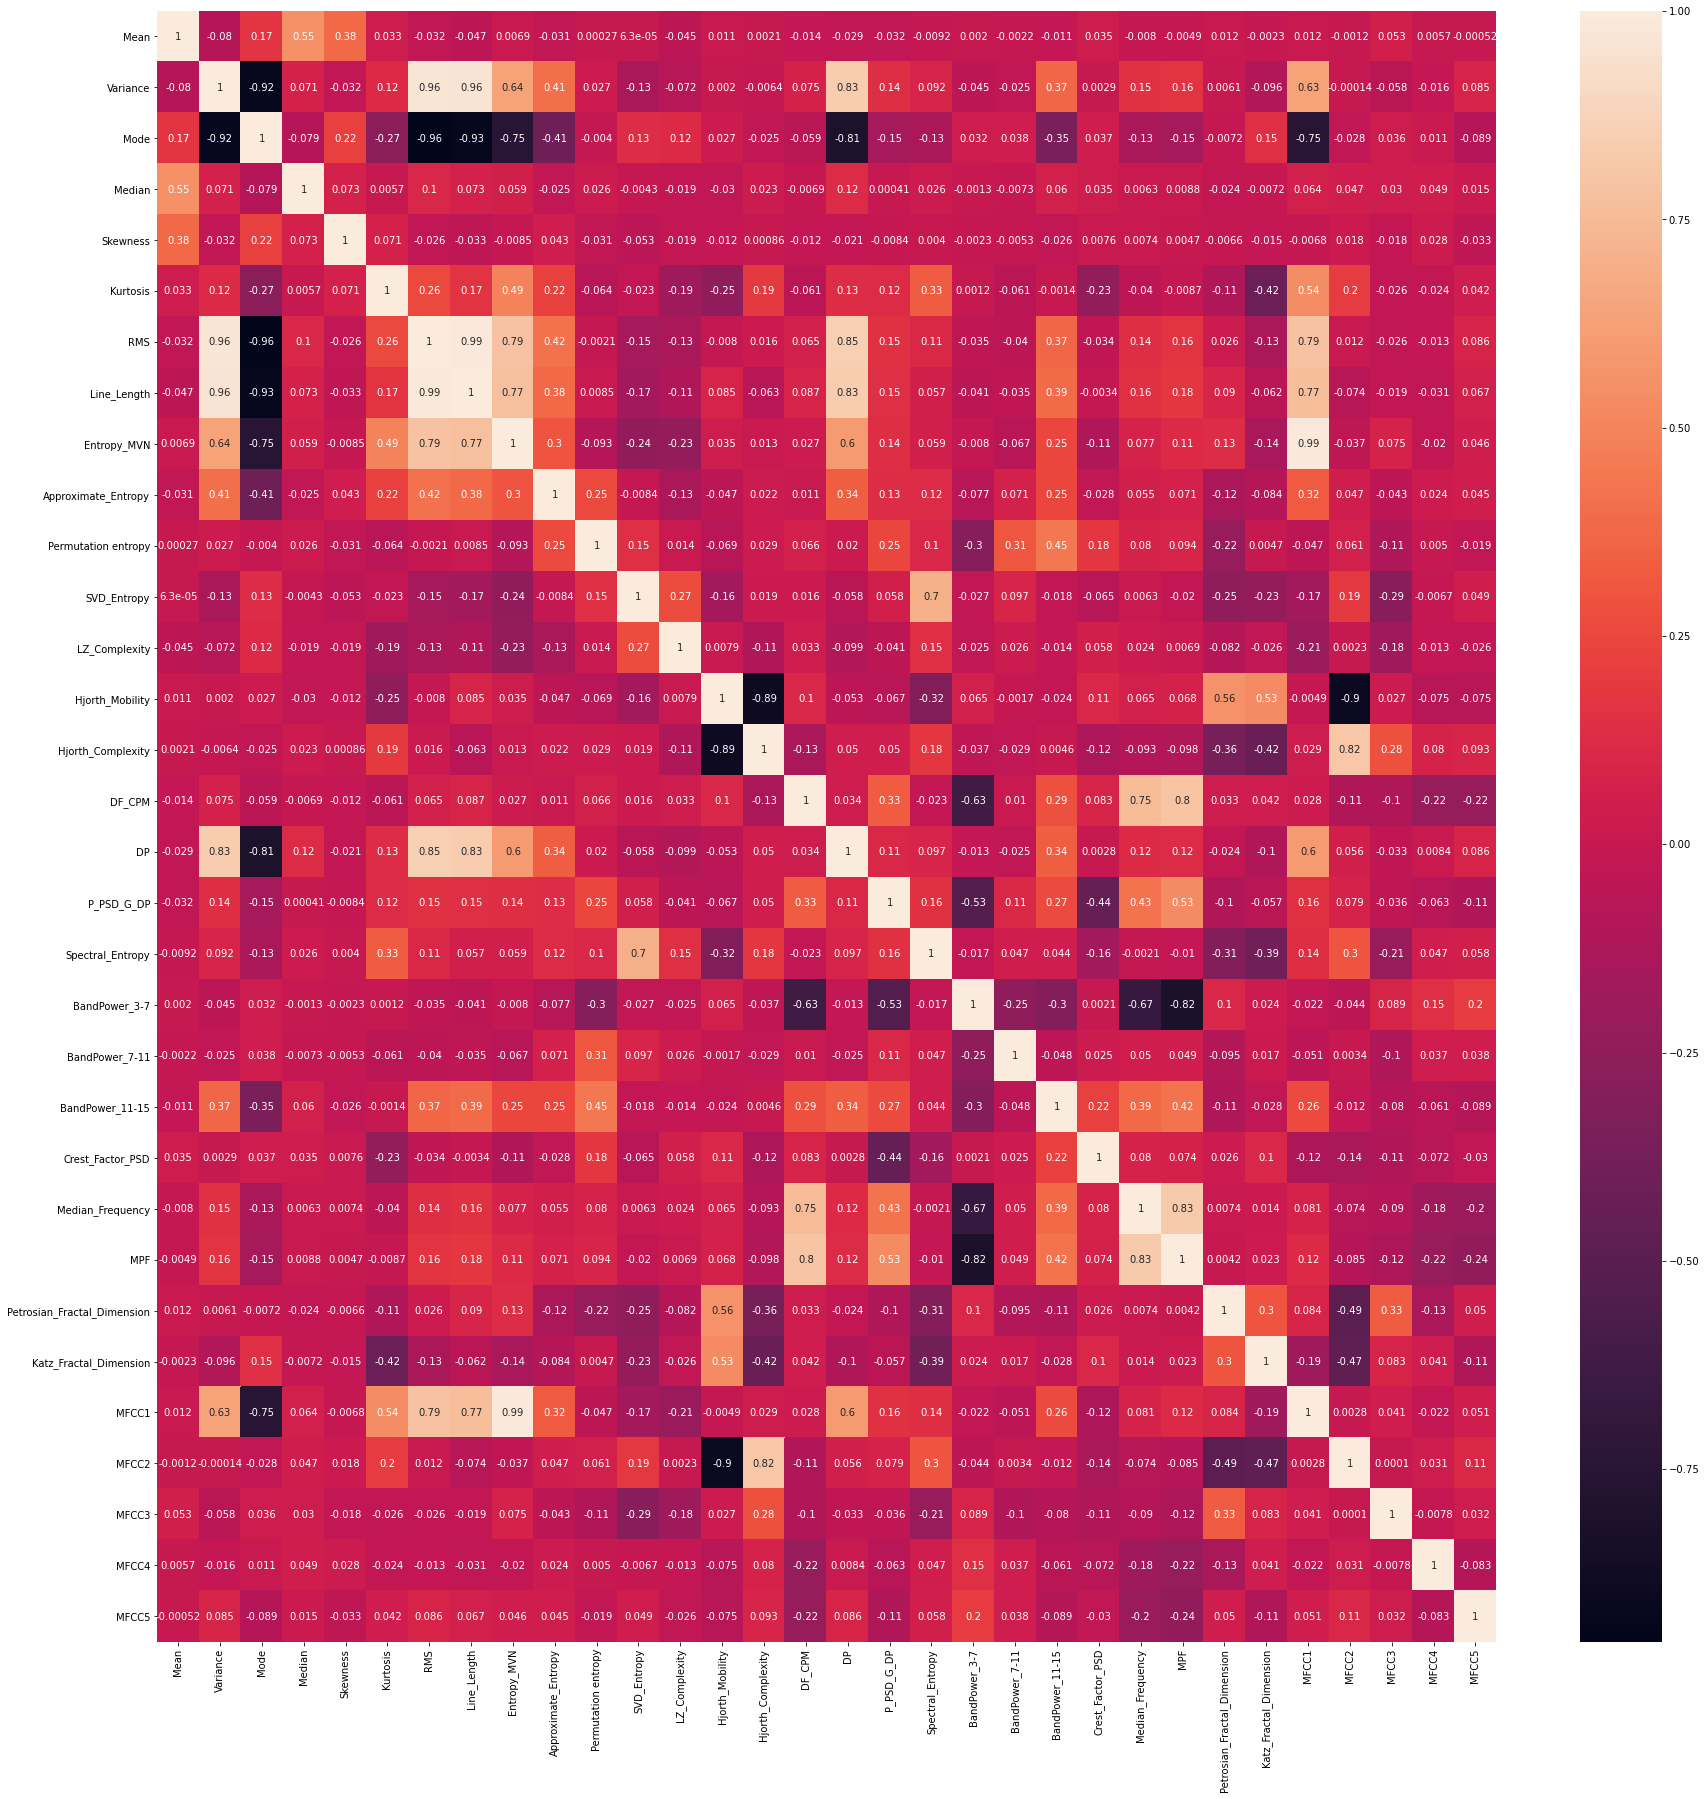

In [11]:
data_df_copy = data_df.drop(['state','channel','ID'],axis=1)
corrMatrix = data_df_copy.corr()
plt.figure(figsize=[30,30])
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [12]:
X= data_df.drop(['state','channel','ID'],axis=1)
y = data_df.state

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 69,stratify=y,shuffle=True)

In [13]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(11520, 32)
(11520,)
(2880, 32)
(2880,)


(None, None)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(11520, 32)
(2880, 32)


### hyperparameter Tuning with Optuna

In [15]:
RANDOM_SEED = 42

# 10-fold CV
kfolds = KFold(n_splits=10, shuffle=True, random_state=RANDOM_SEED)

In [16]:
def tune(objective):
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)

    params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score} ")
    print(f"Optimized parameters: {params}")
    return params

In [17]:
def randomforest_objective(trial):
    _n_estimators = trial.suggest_int("n_estimators", 50, 1000)
    _max_depth = trial.suggest_int("max_depth", 5, 100)
    _min_samp_split = trial.suggest_int("min_samples_split", 2, 50)
    _min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 10)
    _max_features = trial.suggest_int("max_features", 10, 32)

    rf =  RandomForestClassifier(
        max_depth=_max_depth,
        min_samples_split=_min_samp_split,
        min_samples_leaf=_min_samples_leaf,
        max_features=_max_features,
        n_estimators=_n_estimators,
        n_jobs=5,
        random_state=RANDOM_SEED,
    )

    score = cross_val_score(
        rf, X_train, y_train, cv=kfolds, scoring=make_scorer(matthews_corrcoef), 
    ).mean()
    return score




In [18]:
randomforest_params = tune(randomforest_objective)

[I 2022-08-06 10:20:11,144] A new study created in memory with name: no-name-a6ce4dc1-48e3-4c25-9a79-55bd546d057a
[I 2022-08-06 10:21:10,679] Trial 0 finished with value: 0.7280315327328598 and parameters: {'n_estimators': 110, 'max_depth': 83, 'min_samples_split': 31, 'min_samples_leaf': 9, 'max_features': 27}. Best is trial 0 with value: 0.7280315327328598.
[I 2022-08-06 10:27:44,360] Trial 1 finished with value: 0.7155313507219064 and parameters: {'n_estimators': 860, 'max_depth': 57, 'min_samples_split': 50, 'min_samples_leaf': 3, 'max_features': 24}. Best is trial 0 with value: 0.7280315327328598.
[I 2022-08-06 10:31:12,001] Trial 2 finished with value: 0.7451183902677456 and parameters: {'n_estimators': 642, 'max_depth': 29, 'min_samples_split': 29, 'min_samples_leaf': 4, 'max_features': 16}. Best is trial 2 with value: 0.7451183902677456.
[I 2022-08-06 10:34:39,506] Trial 3 finished with value: 0.7055930278761251 and parameters: {'n_estimators': 954, 'max_depth': 68, 'min_sample

Best score: 0.8324041993008053 
Optimized parameters: {'n_estimators': 809, 'max_depth': 39, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 29}


In [19]:
randomforest_params ={'n_estimators': 809, 'max_depth': 39, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 29}
rf = RandomForestClassifier(n_jobs=-1, random_state=RANDOM_SEED, **randomforest_params)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=39, max_features=29, min_samples_leaf=2,
                       min_samples_split=4, n_estimators=809, n_jobs=-1,
                       random_state=42)

In [21]:
prediction = rf.predict(X_test)

In [22]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

     fasting       0.93      0.93      0.93      1440
postprandial       0.93      0.93      0.93      1440

    accuracy                           0.93      2880
   macro avg       0.93      0.93      0.93      2880
weighted avg       0.93      0.93      0.93      2880



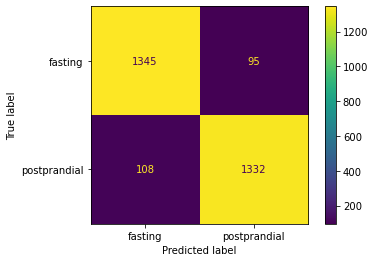

In [23]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)